In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from datetime import date
import pandas as pd
from sqlalchemy import create_engine, func
from sqlalchemy.ext.automap import automap_base
import sqlalchemy
from sqlalchemy.orm import Session
from sqlalchemy import Column, Integer, String, Text, Date, Float, func
from flask import Flask, jsonify

In [8]:
engine = create_engine('sqlite:///hawaii.sqlite')

In [9]:
Base=automap_base()

In [10]:
Base.prepare(engine, reflect=True)

In [11]:
#check to see if it works... OMG it works again! Codes are magical.
Base.classes.keys()

['measurement', 'station']

In [12]:
#let's save these reflections into variables
Stations = Base.classes.station
Measurement = Base.classes.measurement

# Precipitation Analysis

In [13]:
session = Session(engine)

In [14]:
#retrieve the last 12 months of precipitation data
measurement = pd.read_sql_query("SELECT * FROM Measurement", engine)

In [15]:
measurement['date'] = measurement['date'].astype('datetime64[ns]')

In [16]:
#retrieve the data from the past 12 months
# the pandas way: 
oneYr = measurement[(measurement['date'] > '2016-08-23') & (measurement['date'] < '2017-08-23')]

# the sqlalchemy way:
# prcp1yr = session.query(Measurement.date, Measurement.prcp)\
# .filter(Measurement.date.between('2016-08-23','2017-08-23')).order_by(Measurement.date.asc()).all()

In [17]:
#select only the prcp and date column, and set date as index
# the pandas way: 
prcp1yr = oneYr[['date','prcp']].set_index('date')

# the sqlalchemy way:
# date = [i[0] for i in prcp1yr]
# precipitation = [i[1] for i in prcp1yr]
# prcp1yr = pd.DataFrame(prcp1yr, columns=['date', 'precipitation']).set_index('date')

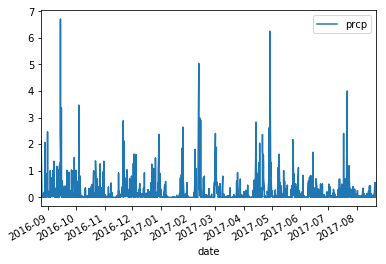

In [18]:
#plot a graph
prcp1yr.plot()

In [19]:
#summary statistic
prcp1yr.describe()

,prcp
count,2011.000000
mean,0.176549
std,0.460667
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [20]:
#let's check out what the station data looks like...
station = pd.read_sql_query("SELECT * FROM station", engine).set_index('id')
station

,station,name,latitude,longitude,elevation
id,,,,,
1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [21]:
# to calculate the total number of stations
pd.read_sql_query("SELECT COUNT(station) FROM station", engine)

,COUNT(station)
0,9


In [22]:
# to calculate the most active station
stationCount = pd.read_sql_query("SELECT *, COUNT(tobs) FROM measurement GROUP BY station ORDER BY COUNT(tobs) DESC", engine)
print(stationCount)
print("")
print("The most active station is %s, id %s, with a tobs count of %s" % (stationCount['station'][0], stationCount['id'][0], stationCount['COUNT(tobs)'][0]))

      id      station        date  prcp  tobs  COUNT(tobs)
0  13687  USC00519281  2017-08-18  0.06    79         2772
1   5381  USC00513117  2017-07-31  0.00    77         2696
2   2685  USC00519397  2017-08-23  0.00    81         2685
3  10915  USC00519523  2017-08-23  0.08    82         2572
4  18103  USC00516128  2017-08-23  0.45    76         2484
5   7318  USC00514830  2017-08-23  0.00    82         1937
6  15619  USC00511918  2015-10-30  0.00    64         1932
7   8001  USC00517948  2017-07-28  0.01    80          683
8   8343  USC00518838  2015-10-20  0.00    74          342

The most active station is USC00519281, id 13687, with a tobs count of 2772


# Temperature Analysis

In [23]:
#get the data from the most observed station within the last year
tobs1yr = pd.read_sql_query("SELECT * FROM measurement WHERE station = 'USC00519281'", engine)
#doing the pandas way because it's 
tobs1yr = tobs1yr[(tobs1yr['date'] > '2016-08-23') & (tobs1yr['date'] < '2017-08-23')]

In [24]:
tobs1yr = tobs1yr[['date','tobs']].set_index('date')

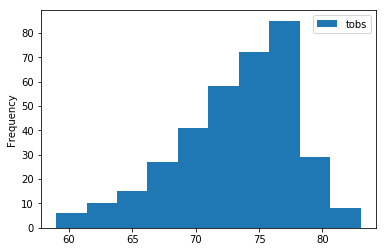

In [25]:
tobs1yr.plot.hist()

# Temperature Analysis

In [26]:
calcTemp = measurement[['date','tobs']]
def calc_temp(start_date, end_date):
    start_date = start_date - pd.offsets.DateOffset(years=1)
    end_date = end_date - pd.offsets.DateOffset(years=1)
    return calcTemp[(calcTemp['date'] > start_date) & (calcTemp['date'] < '2017-08-23')].describe()

In [27]:
tempStats = calc_temp(pd.to_datetime('2018-07-01'), pd.to_datetime('2018-07-10'))
tempStats

,tobs
count,249.000000
mean,78.493976
std,2.940431
min,69.000000
25%,77.000000
50%,79.000000
75%,81.000000
max,84.000000


In [28]:
tmin = tempStats.loc["min"].values
tmax = tempStats.loc["max"].values
tmean = tempStats.loc["mean"].values

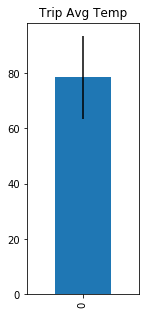

In [29]:
tmean = pd.DataFrame(tmean)
tmean.plot(kind='bar', yerr=[tmin-tmax], title = "Trip Avg Temp", figsize = (2, 5), legend=False)

# Routes

In [ ]:
app = Flask(__name__)
localhost:5000
    
@api.route("/v1.0/precipitation")
def prcp():
    prcp = []
    for i in prcp1yr:
        prcpDict = {}
        prcpDict['date'] = prcp1yr.index
        prcpDict['prcp'] = prcp1yr['prcp']
        prcp.append(prcpDict)
    return jsonify(prcp)

@api.route("/v1.0/stations")
def station():
    jsonify(list(station['station']))
    
@api.route("/v1.0/tobs")
def tobs():
    jsonify(list(oneYr['tobs']))
    
@api.route("/v1.0/<start>")
def start(start_date):
    return jsonify(list(calcTemp[(calcTemp['date'] > start_date).describe()))
                                 
@api.route("/v1.0/<start>/<end>")
def start(start_date, end_date):
    return jsonify(list(calcTemp[(calcTemp['date'] > start_date) & (calcTemp['date'] < '2017-08-23')].describe()))
                                 
if __name__ == "__main__":
    app.run(debug=True)